In [1]:
'''
1. 株価の時間による変化を見てみる
2. 日ごとの変動を可視化する
3. 移動平均を計算する
4. 複数の株価の終値の相関を計算する
5. 複数の株価の変動の関係を見る
6. 特定の株のリスクを計算する
7. シミレーションを使った未来の予測
'''

'\n1. 株価の時間による変化を見てみる\n2. 日ごとの変動を可視化する\n3. 移動平均を計算する\n4. 複数の株価の終値の相関を計算する\n5. 複数の株価の変動の関係を見る\n6. 特定の株のリスクを計算する\n7. シミレーションを使った未来の予測\n'

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
plt.style.use('seaborn-whitegrid')

In [5]:
# from pandas.io.data import DataReader
import pandas_datareader.data as pdd

In [6]:
from datetime import datetime

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
# 1年前から今日まで
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = pdd.DataReader(stock, 'morningstar', start, end)

In [10]:
# globals -> [stock]の文字列 -> プログラムのコードを変数で置き換える
type(AAPL)

pandas.core.frame.DataFrame

In [11]:
AAPL.describe()

,Close,High,Low,Open,Volume
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02
mean,162.730308,163.982473,161.468404,162.752500,2.947345e+07
std,10.564588,10.679758,10.572425,10.580889,1.328936e+07
min,142.270000,143.500000,142.200000,142.900000,0.000000e+00
25%,153.980000,154.839725,153.310000,154.000000,2.149695e+07
50%,162.515000,163.890000,160.255000,162.615000,2.670501e+07
75%,172.455000,174.030000,171.560000,172.532500,3.529748e+07
max,181.720000,183.500000,180.210000,182.590000,8.659382e+07


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 260 entries, (AAPL, 2017-05-01 00:00:00) to (AAPL, 2018-04-27 00:00:00)
Data columns (total 5 columns):
Close     260 non-null float64
High      260 non-null float64
Low       260 non-null float64
Open      260 non-null float64
Volume    260 non-null int64
dtypes: float64(4), int64(1)
memory usage: 13.1+ KB


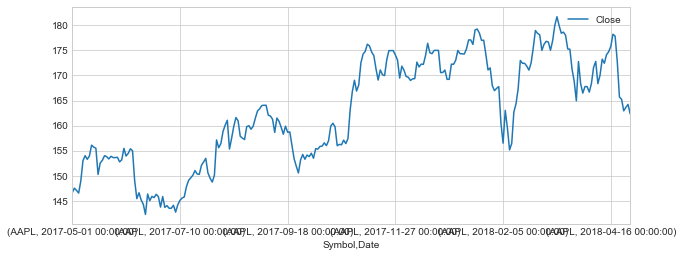

In [13]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

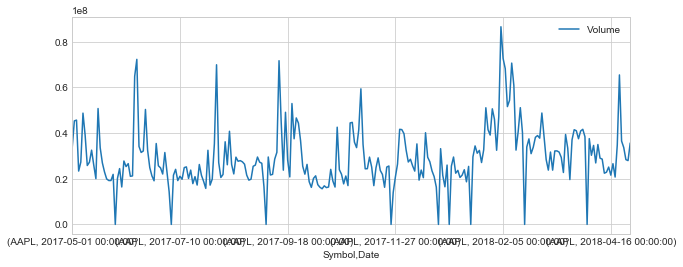

In [14]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [15]:
# 移動平均線(Moving Average)
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'], ma)
    #AAPL[column_name] = Series.rolling(window=10,center=False).mean(AAPL['Close'], ma)

/Users/hiraku/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
/Users/hiraku/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/Users/hiraku/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


In [16]:
AAPL.head()

Close    High     Low    Open    Volume  MA 10  MA 20  \
Symbol Date                                                                 
AAPL   2017-05-01  146.58  147.20  144.96  145.10  33602943    NaN    NaN   
       2017-05-02  147.51  148.09  146.84  147.54  45352194    NaN    NaN   
       2017-05-03  147.06  147.49  144.27  145.59  45697034    NaN    NaN   
       2017-05-04  146.53  147.14  145.81  146.52  23371872    NaN    NaN   
       2017-05-05  148.96  148.98  146.76  146.76  27327725    NaN    NaN   

                   MA 50  
Symbol Date               
AAPL   2017-05-01    NaN  
       2017-05-02    NaN  
       2017-05-03    NaN  
       2017-05-04    NaN  
       2017-05-05    NaN

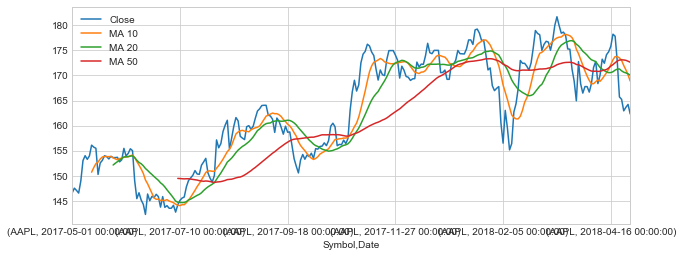

In [17]:
# ただプロットすると、4つ分描画されるので、subplotsをFalse指定
AAPL[['Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

#### Section 2 - 株価と日ごとの変動

株式投資のリスクを管理するために、日ごとの変動について計算してみます。

In [18]:
# 終値を昨日の終値と比較
# pct_change percent changeの略で、それぞれ元の日毎のある一日毎の終値を比較して何％変化したかを計算
AAPL['Daily Return'] = AAPL['Close'].pct_change()

In [19]:
AAPL.head()

Close    High     Low    Open    Volume  MA 10  MA 20  \
Symbol Date                                                                 
AAPL   2017-05-01  146.58  147.20  144.96  145.10  33602943    NaN    NaN   
       2017-05-02  147.51  148.09  146.84  147.54  45352194    NaN    NaN   
       2017-05-03  147.06  147.49  144.27  145.59  45697034    NaN    NaN   
       2017-05-04  146.53  147.14  145.81  146.52  23371872    NaN    NaN   
       2017-05-05  148.96  148.98  146.76  146.76  27327725    NaN    NaN   

                   MA 50  Daily Return  
Symbol Date                             
AAPL   2017-05-01    NaN           NaN  
       2017-05-02    NaN      0.006345  
       2017-05-03    NaN     -0.003051  
       2017-05-04    NaN     -0.003604  
       2017-05-05    NaN      0.016584

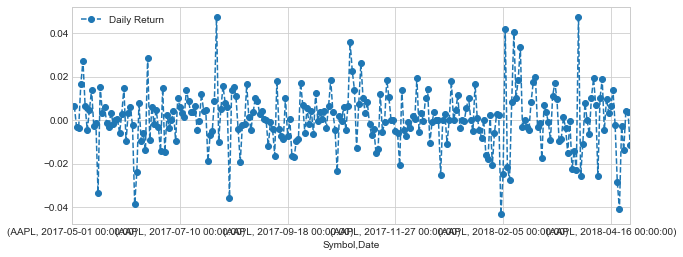

In [20]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

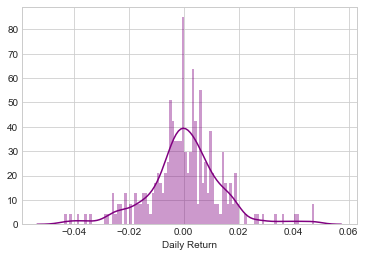

In [21]:
# こういう変動が1年でどれくらいの分布になっているのか、ヒストグラムを描画
# seabornを使って、distplot -> ヒストグラムと一緒にカーネル密度推定(Kernel density estimation)も描画
# Daily Returnなので、最初の日分を取り除くため、dropna()
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

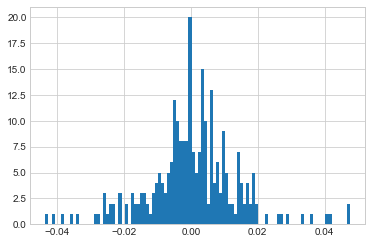

In [22]:
# カーネル密度推定が要らなければ、pandasのhistで描画可能
AAPL['Daily Return'].hist(bins=100)

In [49]:
# 他の株価も
#closing_df = pdd.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df = pdd.DataReader(['AAPL','GOOG','MSFT','AMZN'], 'morningstar', start, end)['Close']

In [53]:
type(closing_df)

pandas.core.series.Series

In [56]:
closing_df_u = closing_df.unstack(0)

In [58]:
type(closing_df_u)

pandas.core.frame.DataFrame

In [57]:
closing_df_u.head()

Symbol,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-05-01,146.58,948.23,912.57,69.41
2017-05-02,147.51,946.94,916.44,69.30
2017-05-03,147.06,941.03,927.04,69.08
2017-05-04,146.53,937.53,931.66,68.81
2017-05-05,148.96,934.15,927.13,69.00


In [59]:
tech_rets = closing_df_u.pct_change()

In [60]:
tech_rets.head()

Symbol,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-05-01,NaN,NaN,NaN,NaN
2017-05-02,0.006345,-0.001360,0.004241,-0.001585
2017-05-03,-0.003051,-0.006241,0.011566,-0.003175
2017-05-04,-0.003604,-0.003719,0.004984,-0.003909
2017-05-05,0.016584,-0.003605,-0.004862,0.002761


In [61]:
type(tech_rets)

pandas.core.frame.DataFrame

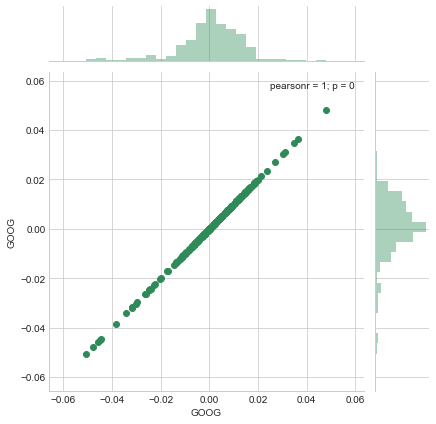

In [62]:
# これを会社同士で比較(scatter -> 散布図)
# 同じ会社なので、相関は一緒
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

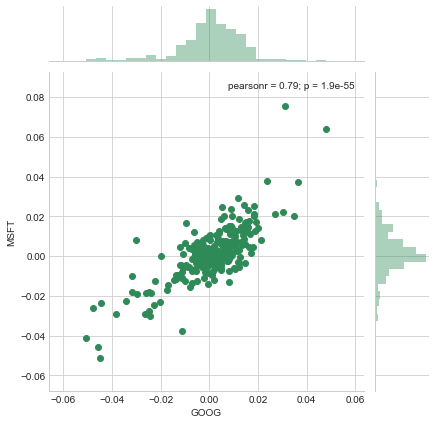

In [63]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

In [64]:
# pearsonrは相関係数(ピアソン積率相関係数)

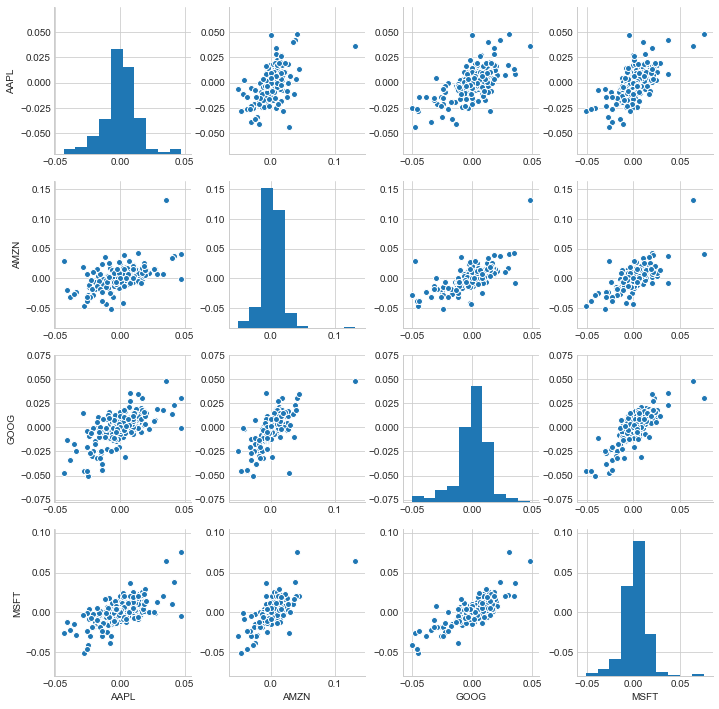

In [65]:
# 対角線上は同じ会社が並ぶので、ヒストグラムが描画
sns.pairplot(tech_rets.dropna())

/Users/hiraku/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


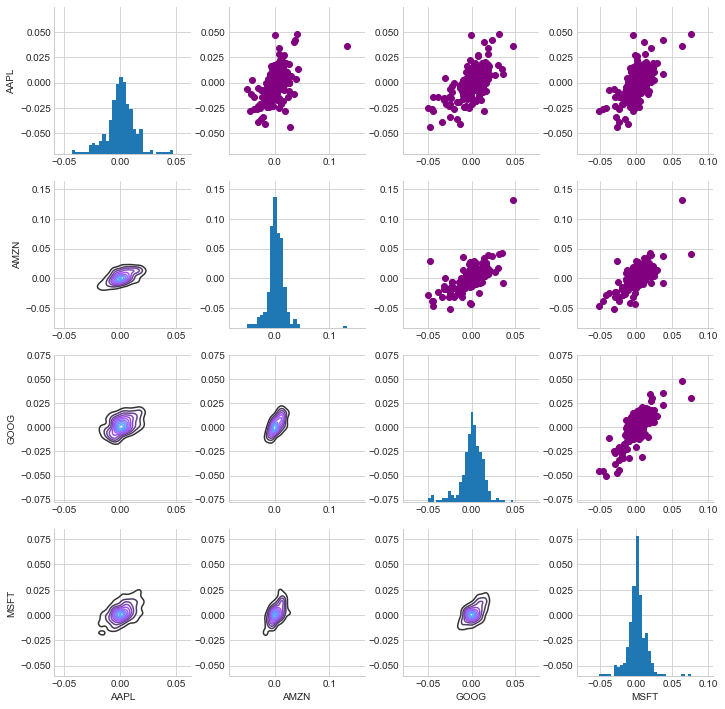

In [66]:
# seabornで上側と下側のグラフを変更してみる
# 対角線上はヒストグラム、右がscatter plot、左がkde plot
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

/Users/hiraku/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


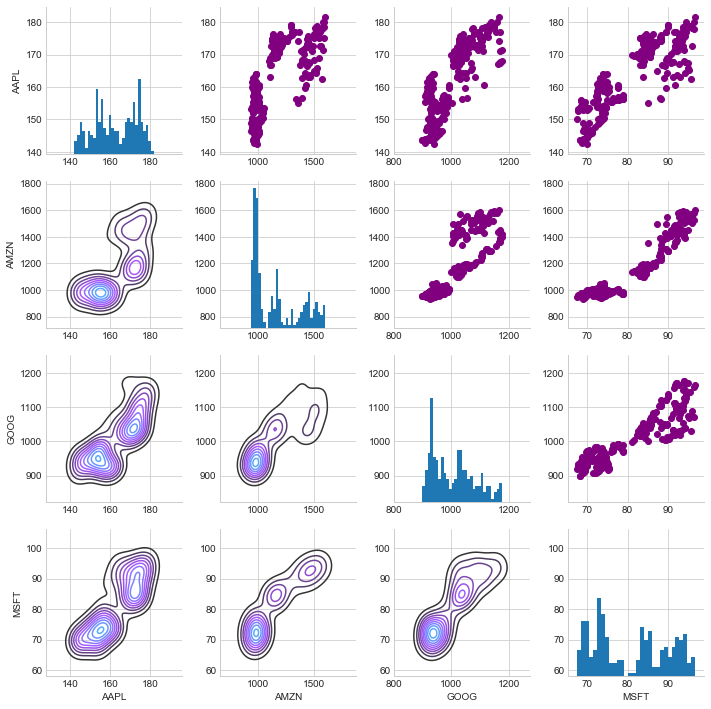

In [68]:
# 終値で比較
returns_fig = sns.PairGrid(closing_df_u)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

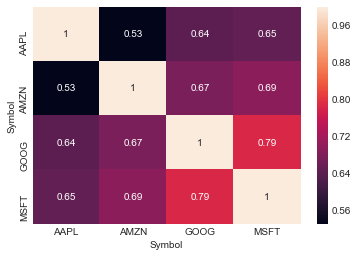

In [69]:
sns.heatmap(tech_rets.corr(), annot=True)

#### リスク解析

横軸にリターン、縦軸にリスク

In [70]:
rets = tech_rets.dropna()

In [71]:
rets.head()

Symbol,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-05-02,0.006345,-0.001360,0.004241,-0.001585
2017-05-03,-0.003051,-0.006241,0.011566,-0.003175
2017-05-04,-0.003604,-0.003719,0.004984,-0.003909
2017-05-05,0.016584,-0.003605,-0.004862,0.002761
2017-05-08,0.027189,0.015940,0.007734,-0.000870


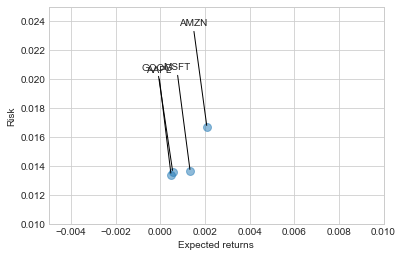

In [91]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(0, 100),
                 textcoords = 'offset points', ha='right', va='bottom',
                 arrowprops = dict(arrowstyle='-', connectionstyle='arc3'))

#### Value at Risk

ある一定の確率で、資産がどれくらい減ってしまう可能性があるのかを見積もる方法に、Value at Risk（VaR）という考え方があります。このValue at Riskの計算方法にもいくつかの方法がありますが、ここではまず、Value at Riskの考え方から説明し、実際に数字を見積もってみます。

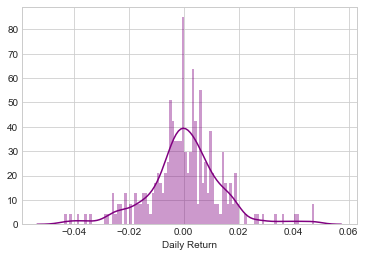

In [95]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [96]:
rets['AAPL'].quantile(0.05)

-0.023207032194723774

In [97]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [98]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]* (drift[x]+shock[x]))
    return price

In [99]:
GOOG.head()

Close    High       Low    Open   Volume
Symbol Date                                                 
GOOG   2017-05-01  912.57  915.68  901.4500  901.94  2115993
       2017-05-02  916.44  920.77  909.4526  909.62  1587219
       2017-05-03  927.04  928.10  912.5426  914.86  1499532
       2017-05-04  931.66  935.93  924.5900  926.07  1422144
       2017-05-05  927.13  934.90  925.2000  933.54  1911275

Text(0.5,1,'Mote Carlo Analysis')

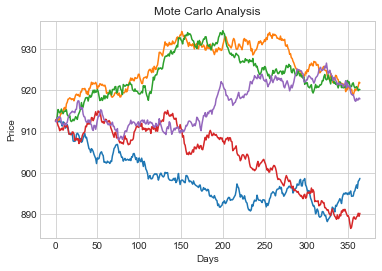

In [101]:
start_price = GOOG.iloc[0,0]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Mote Carlo Analysis')

In [103]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
 

(array([ 1.,  0.,  0., ...,  0.,  0.,  1.]),
 array([ 866.93338727,  867.43580471,  867.93822214, ...,  966.4120398 ,
         966.91445724,  967.41687467]),
 <a list of 200 Patch objects>)

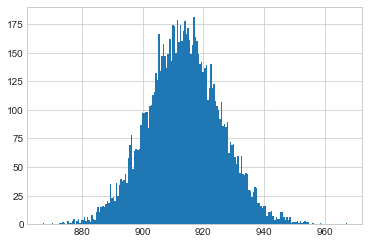

In [104]:
plt.hist(simulations, bins=200)

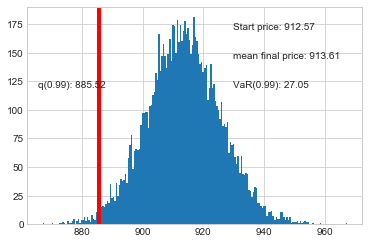

In [105]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: {:0.2f}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price: {:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x=q, linewidth=4, color='r')